In [38]:
#Spring 2022 Project - Echo Ridge and Dartmouth MEM
#Analysis of Invisage Data to derive investment signal

from pathlib import Path 
import pathlib
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder



import pandas
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn import tree

In [34]:
#Loading the datasets

coredata = pd.read_csv (r'C:\Users\sanja\OneDrive\Desktop\daplproject\coredata.csv')   #read the csv file 
premiumdata = pd.read_csv (r'C:\Users\sanja\OneDrive\Desktop\daplproject\premiumdata.csv')

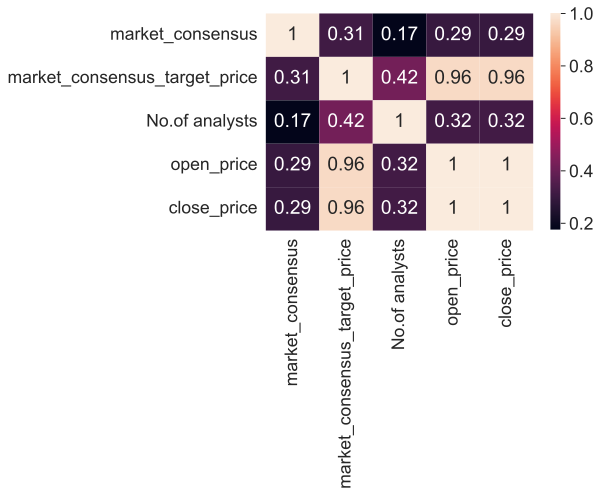

In [35]:
#Correlation plot with core dataset

corr = coredata.corr()
sns.heatmap(corr, annot=True)
plt.show()

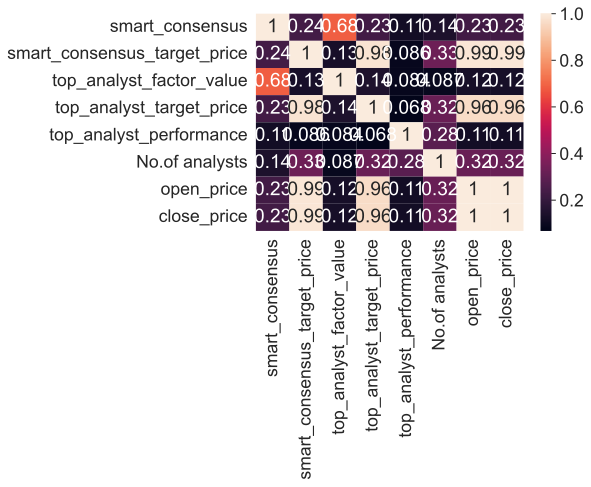

In [37]:
#Correlation plot with premium dataset

corr = premiumdata.corr()
sns.heatmap(corr, annot=True)
plt.show()

#Consider removing top analyst factor value and performance

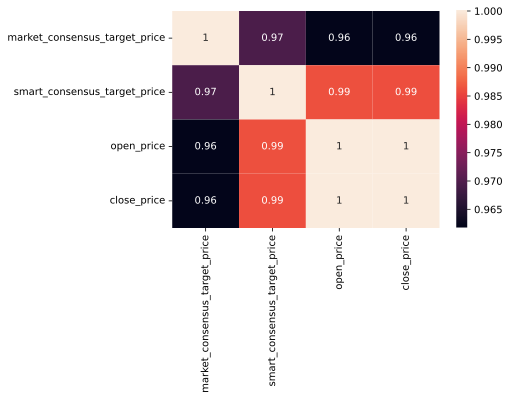

date                              object
security_name                     object
symbol                            object
No.of analysts                     int64
top_analyst_factor_value         float64
top_analyst_target_price         float64
top_analyst_name                  object
top_analyst_performance          float64
market_consensus                 float64
smart_consensus                  float64
market_consensus_target_price    float64
smart_consensus_target_price     float64
open_price                       float64
close_price                      float64
dtype: object

In [5]:
#Correlation between a few features in the combined dataset (core and premium datasets) 

combineddata = pd.read_csv (r'C:\Users\sanja\OneDrive\Desktop\daplproject\Combineddata.csv')
df = combineddata.iloc[:, 10:14]
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()
combineddata.dtypes

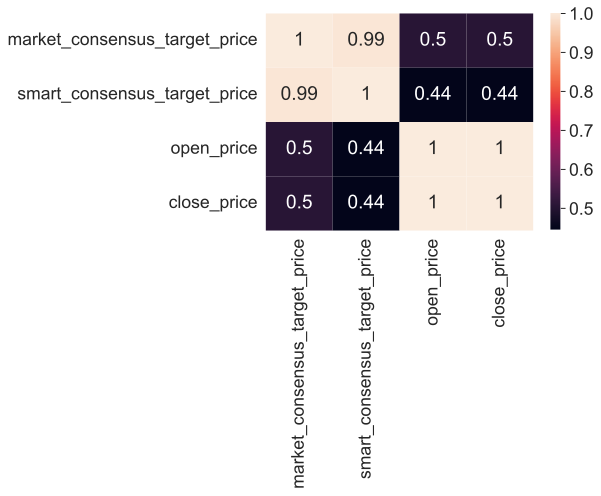

In [40]:
#Part I - Exploratory Data Analysis 

#Correlations are done for periods one week, one month, 3 months, 6 months, 1 year and 3 years for 2013, 2015 and 2017

#Correlation with one week - 2013

combineddata['date'] = pd.to_datetime(combineddata['date'])
combineddata = combineddata.sort_values(by='date', ascending = 'TRUE')  # Sorted by date
Week_1_data = combineddata.loc[(combineddata['date'] >= '2013-02-04') & (combineddata['date'] < '2013-02-09')]
Week_1_data = Week_1_data.iloc[:, 10:14]
corr = Week_1_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

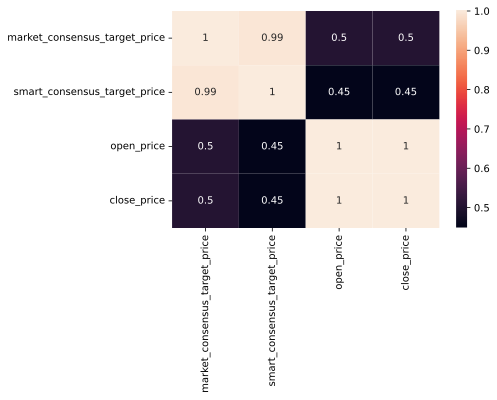

In [7]:
#Correlation with one month - 2013

Month_1_data = combineddata.loc[(combineddata['date'] >= '2013-02-01') & (combineddata['date'] < '2013-03-01')]
Month_1_data = Month_1_data.iloc[:, 10:14]
corr = Month_1_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

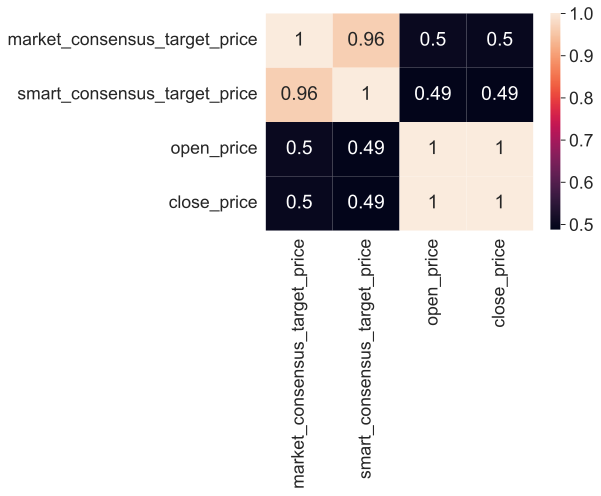

In [41]:
#Correlation with three months - 2013 

ThreeMonths_data = combineddata.loc[(combineddata['date'] >= '2013-02-01') & (combineddata['date'] < '2013-05-01')]
ThreeMonths_data = ThreeMonths_data.iloc[:, 10:14]
corr = ThreeMonths_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

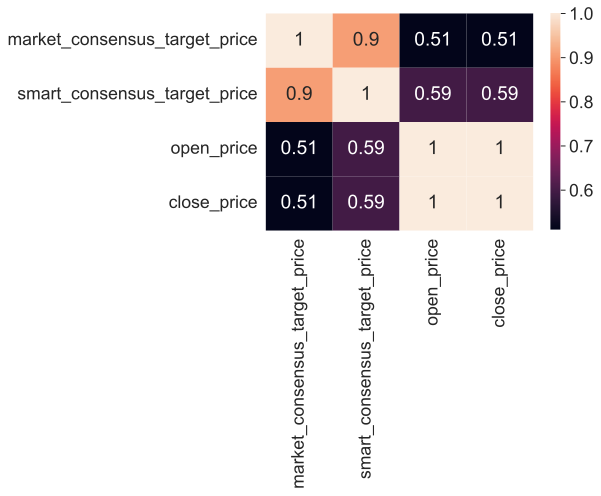

In [42]:
#Correlation with six months - 2013
SixMonths_data = combineddata.loc[(combineddata['date'] >= '2013-02-01') & (combineddata['date'] < '2013-08-01')]
SixMonths_data = SixMonths_data.iloc[:, 10:14]
corr = SixMonths_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

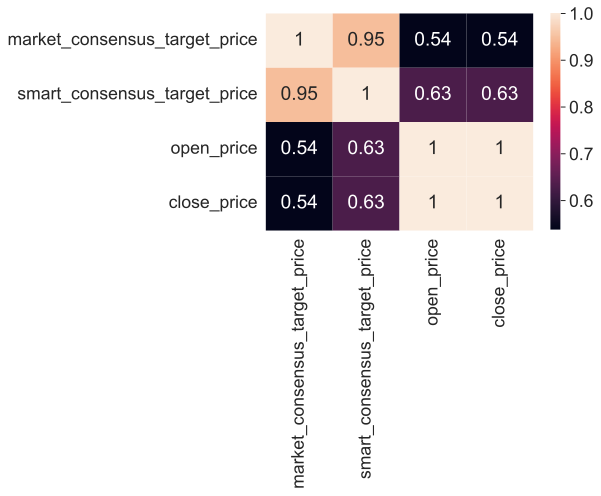

In [43]:
#Correlation with a year - 2013

OneYear_data = combineddata.loc[(combineddata['date'] >= '2013-02-01') & (combineddata['date'] < '2014-02-01')]
OneYear_data = OneYear_data.iloc[:, 10:14]
corr = OneYear_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

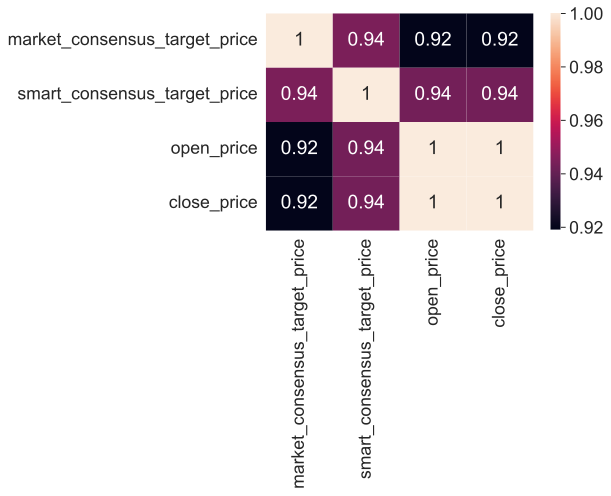

In [44]:
#Correlation with three years - 2013

ThreeYear_data = combineddata.loc[(combineddata['date'] >= '2013-02-01') & (combineddata['date'] < '2018-02-01')]
ThreeYear_data = ThreeYear_data.iloc[:, 10:14]
corr = ThreeYear_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

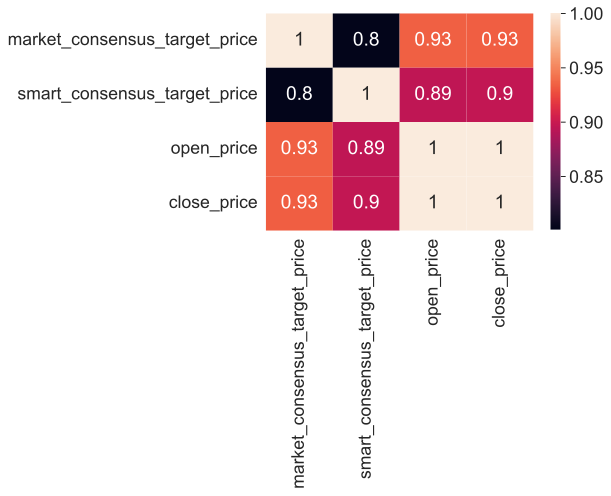

In [45]:
#Correlation with one week - 2015
Week_1_data = combineddata.loc[(combineddata['date'] >= '2015-02-02') & (combineddata['date'] < '2015-02-07')]
Week_1_data = Week_1_data.iloc[:, 10:14]
corr = Week_1_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

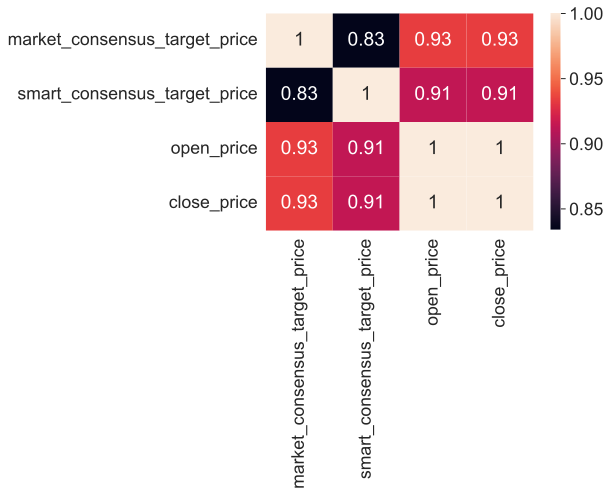

In [46]:
#Correlation with one month - 2015
Month_1_data = combineddata.loc[(combineddata['date'] >= '2015-02-01') & (combineddata['date'] < '2015-03-01')]
Month_1_data = Month_1_data.iloc[:, 10:14]
corr = Month_1_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

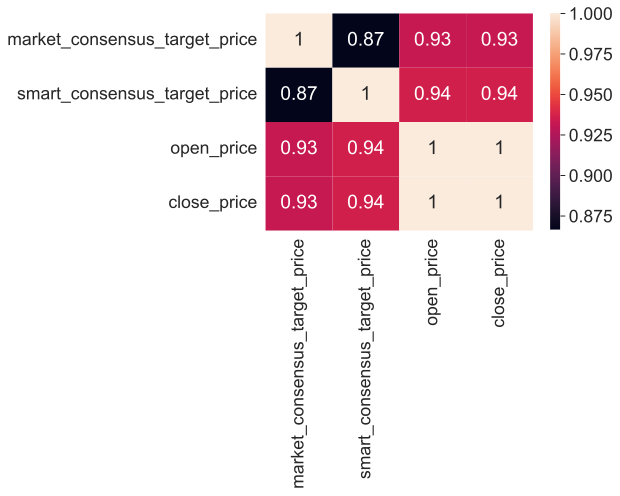

In [47]:
#Correlation with three months 2015
ThreeMonths_data = combineddata.loc[(combineddata['date'] >= '2015-02-01') & (combineddata['date'] < '2015-05-01')]
ThreeMonths_data = ThreeMonths_data.iloc[:, 10:14]
corr = ThreeMonths_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

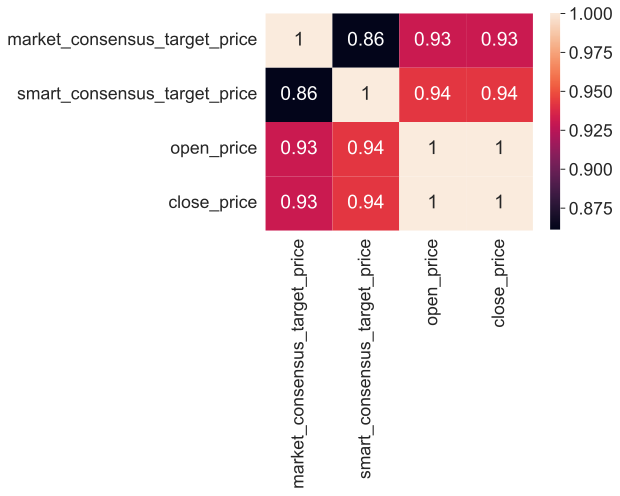

In [48]:
#Correlation with six months 2015
SixMonths_data = combineddata.loc[(combineddata['date'] >= '2015-02-01') & (combineddata['date'] < '2015-08-01')]
SixMonths_data = SixMonths_data.iloc[:, 10:14]
corr = SixMonths_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

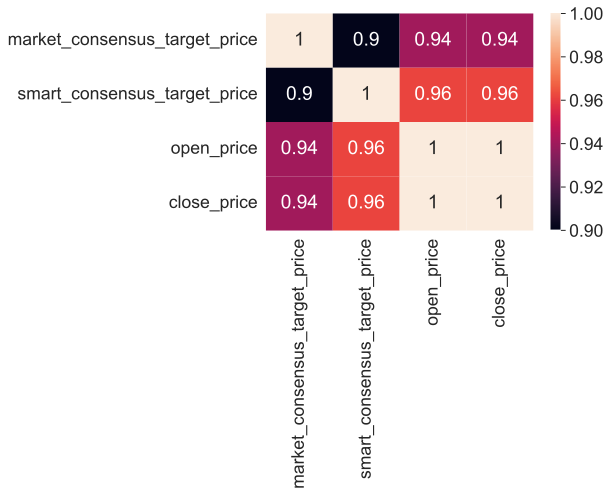

In [49]:
#Correlation with a year 2015
OneYear_data = combineddata.loc[(combineddata['date'] >= '2015-02-01') & (combineddata['date'] < '2016-02-01')]
OneYear_data = OneYear_data.iloc[:, 10:14]
corr = OneYear_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

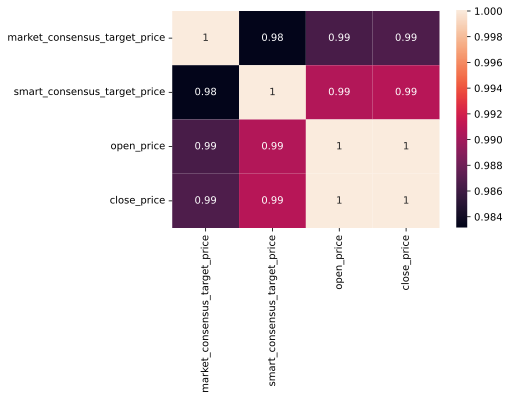

In [13]:
#Correlation with one week- 2017
Week_1_data = combineddata.loc[(combineddata['date'] >= '2017-05-01') & (combineddata['date'] < '2017-05-06')]
Week_1_data = Week_1_data.iloc[:, 10:14]
corr = Week_1_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

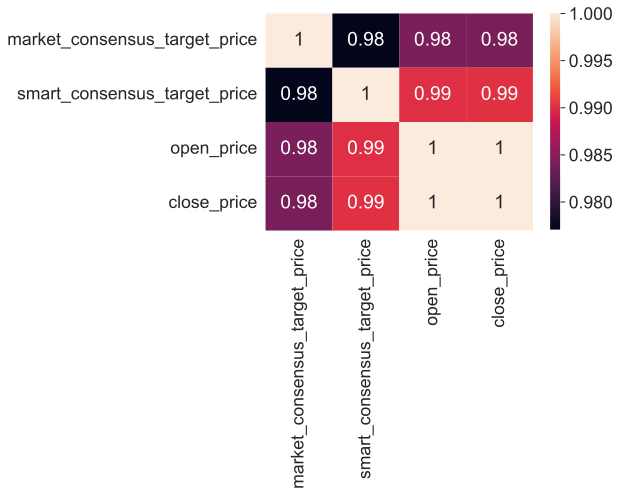

In [50]:
#Correlation with one month 2017
Month_1_data = combineddata.loc[(combineddata['date'] >= '2017-02-01') & (combineddata['date'] < '2017-03-01')]
Month_1_data = Month_1_data.iloc[:, 10:14]
corr = Month_1_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

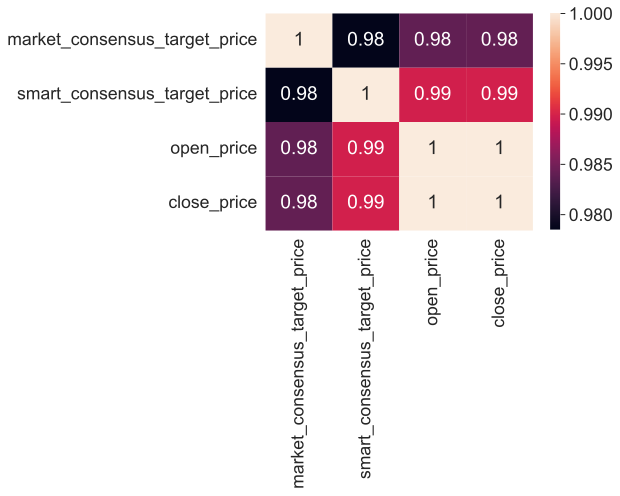

In [51]:
#Correlation with three months 2017
ThreeMonths_data = combineddata.loc[(combineddata['date'] >= '2017-02-01') & (combineddata['date'] < '2017-05-01')]
ThreeMonths_data = ThreeMonths_data.iloc[:, 10:14]
corr = ThreeMonths_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

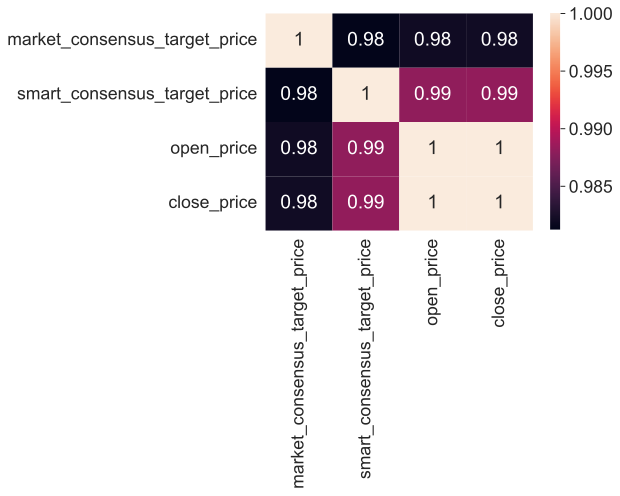

In [52]:
#Correlation with six months 2017
SixMonths_data = combineddata.loc[(combineddata['date'] >= '2017-02-01') & (combineddata['date'] < '2017-08-01')]
SixMonths_data = SixMonths_data.iloc[:, 10:14]
corr = SixMonths_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

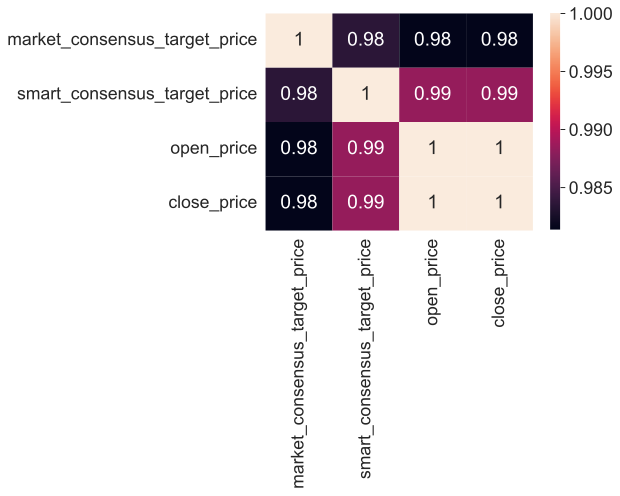

In [53]:
#Correlation with a year 2017
OneYear_data = combineddata.loc[(combineddata['date'] >= '2017-02-01') & (combineddata['date'] < '2018-02-01')]
OneYear_data = OneYear_data.iloc[:, 10:14]
corr = OneYear_data.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [56]:
# Part II - Price Prediction Model

#Model 1 - Deep Neural Network

#Feature engineering
#Dropping symbol column from combinedddata
data = combineddata.drop(columns = "symbol")

#One hot encoding 
data_one_hot_security_name: pd.DataFrame = pd.get_dummies(data, columns = ['security_name']) 
newdata: pd.DataFrame = pd.get_dummies(data_one_hot_security_name, columns = ['top_analyst_name'])

In [57]:
#Encoding date
newdata["year"] = newdata["date"].dt.year
newdata["month"] = newdata["date"].dt.month
newdata["day"] = newdata["date"].dt.day
newdata["week"] = newdata["date"].dt.isocalendar().week
data = newdata.drop(columns = "date")
data

,No.of analysts,top_analyst_factor_value,top_analyst_target_price,top_analyst_performance,market_consensus,smart_consensus,market_consensus_target_price,smart_consensus_target_price,open_price,close_price,...,top_analyst_name_ubs_analyst,top_analyst_name_wedbush_analyst,top_analyst_name_wells_fargo_analyst,top_analyst_name_william_blair_analyst,top_analyst_name_wolfe_research_analyst,top_analyst_name_wunderlich_analyst,year,month,day,week
0,9,10.0,90.0,16.36,21.11,23.65,103.22,102.39,100.690000,100.550000,...,0,0,0,0,0,0,2013,1,31,5
87662,11,10.0,42.6,14.96,20.91,18.11,42.60,36.20,44.250000,43.640000,...,0,0,0,0,0,0,2013,1,31,5
22824,8,10.0,45.0,19.57,20.00,28.48,58.33,47.26,26.200000,26.530000,...,1,0,0,0,0,0,2013,1,31,5
6819,5,50.0,16.0,1.79,50.00,50.00,15.20,16.00,11.290000,11.400000,...,0,0,0,0,0,0,2013,1,31,5
89949,8,10.0,70.0,21.41,2.50,10.00,67.29,61.11,65.220000,64.820000,...,0,0,0,0,0,0,2013,1,31,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45570,7,10.0,156.0,58.70,27.94,10.00,148.88,161.64,181.240000,182.500000,...,0,0,0,0,0,0,2021,11,5,44
43283,6,10.0,54.0,12.46,20.00,10.00,56.00,52.02,56.889999,56.419998,...,0,0,0,0,0,0,2021,11,5,44
20540,3,50.0,31.5,21.20,41.43,50.00,19.62,31.50,25.240000,24.990000,...,0,0,0,0,0,0,2021,11,5,44
18253,11,10.0,175.0,38.23,34.19,23.47,180.07,215.67,231.220001,229.729996,...,0,0,0,0,0,0,2021,11,5,44


In [58]:
#Converting data types
data = data.astype({'day':'float'})
data = data.astype({'week':'float'})
data = data.astype({'year':'float'})
data = data.astype({'month':'float'})
data = data.astype({'No.of analysts':'float'})
data

,No.of analysts,top_analyst_factor_value,top_analyst_target_price,top_analyst_performance,market_consensus,smart_consensus,market_consensus_target_price,smart_consensus_target_price,open_price,close_price,...,top_analyst_name_ubs_analyst,top_analyst_name_wedbush_analyst,top_analyst_name_wells_fargo_analyst,top_analyst_name_william_blair_analyst,top_analyst_name_wolfe_research_analyst,top_analyst_name_wunderlich_analyst,year,month,day,week
0,9.0,10.0,90.0,16.36,21.11,23.65,103.22,102.39,100.690000,100.550000,...,0,0,0,0,0,0,2013.0,1.0,31.0,5.0
87662,11.0,10.0,42.6,14.96,20.91,18.11,42.60,36.20,44.250000,43.640000,...,0,0,0,0,0,0,2013.0,1.0,31.0,5.0
22824,8.0,10.0,45.0,19.57,20.00,28.48,58.33,47.26,26.200000,26.530000,...,1,0,0,0,0,0,2013.0,1.0,31.0,5.0
6819,5.0,50.0,16.0,1.79,50.00,50.00,15.20,16.00,11.290000,11.400000,...,0,0,0,0,0,0,2013.0,1.0,31.0,5.0
89949,8.0,10.0,70.0,21.41,2.50,10.00,67.29,61.11,65.220000,64.820000,...,0,0,0,0,0,0,2013.0,1.0,31.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45570,7.0,10.0,156.0,58.70,27.94,10.00,148.88,161.64,181.240000,182.500000,...,0,0,0,0,0,0,2021.0,11.0,5.0,44.0
43283,6.0,10.0,54.0,12.46,20.00,10.00,56.00,52.02,56.889999,56.419998,...,0,0,0,0,0,0,2021.0,11.0,5.0,44.0
20540,3.0,50.0,31.5,21.20,41.43,50.00,19.62,31.50,25.240000,24.990000,...,0,0,0,0,0,0,2021.0,11.0,5.0,44.0
18253,11.0,10.0,175.0,38.23,34.19,23.47,180.07,215.67,231.220001,229.729996,...,0,0,0,0,0,0,2021.0,11.0,5.0,44.0


In [62]:
# Deep Neural Network Code

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [63]:
# load the dataset

data = data.dropna()
data = data.reset_index(drop = 'TRUE')

x = data.drop(["close_price","open_price","day","month","week","top_analyst_factor_value"], axis=1)
y = data["close_price"]

from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train)


        No.of analysts  top_analyst_target_price  top_analyst_performance  \
22916             10.0                      70.0                    45.13   
110527            10.0                     212.0                    12.04   
84501             20.0                    2080.0                    30.29   
19197             11.0                      73.0                     7.21   
17744             23.0                     695.0                     0.00   
...                ...                       ...                      ...   
84410              8.0                      84.0                    17.50   
58774              6.0                     134.0                    38.26   
110268             3.0                      32.0                    68.53   
13640              9.0                     105.0                    38.50   
105745            17.0                     105.0                    68.34   

        market_consensus  smart_consensus  market_consensus_target_price  \

In [64]:
#Simple Linear Regression

#Variables with p-values greater than 0.05 are eliminated and the model is run again until all 
#p-values are less than 5% significance

import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            close_price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.655e+04
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:34:11   Log-Likelihood:            -4.4518e+05
No. Observations:               90016   AIC:                         8.913e+05
Df Residuals:                   89548   BIC:                         8.957e+05
Df Model:                         467                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
No.of analysts                                         -2.0124      0.050    -40.290      0.000      -2.110      -1.915
top_analyst_target_price                               -0.0648      0.003    -20.778      0.000      -0.071      -0.059
top_analyst_performance                                 0.5812      0.007     83.260      0.000       0.568       0.595
market_consensus                                        0.1155      0.027      4.310      0.000       0.063       0.168
smart_consensus                                        -0.1627      0.014    -11.721      0.000      -0.190      -0.135
market_consensus_target_price                           0.2918      0.005     59.629      0.000       0.282       0.301
smart_consensus_target_price                            0.6737      0.003    205.298      0.000       0.667       0.680
security_name_3M Co.                                -1754.5702    155.943    -11.251      0.000   -2060.218   -1448.923
security_name_AES Corp.                             -1783.4947    156.010    -11.432      0.000   -2089.273   -1477.716
security_name_AMGEN Inc.                            -1759.2655    155.997    -11.278      0.000   -2065.017   -1453.514
security_name_AT&T, Inc.                            -1755.5590    156.003    -11.253      0.000   -2061.323   -1449.795
security_name_Abbvie Inc                            -1777.9856    156.011    -11.397      0.000   -2083.766   -1472.206
security_name_Accenture plc                         -1745.2126    155.944    -11.191      0.000   -2050.862   -1439.564
security_name_Activision Blizzard Inc               -1774.5798    156.103    -11.368      0.000   -2080.540   -1468.620
security_name_Acuity Brands, Inc.                   -1778.0031    156.057    -11.393      0.000   -2083.874   -1472.132
security_name_Adobe Systems Inc.                    -1742.2959    155.930    -11.174      0.000   -2047.918   -1436.674
security_name_Advance Auto Parts Inc                -1759.5139    155.958    -11.282      0.000   -2065.191   -1453.837
security_name_Advanced Micro Devices Inc.           -1788.2622    156.061    -11.459      0.000   -2094.139   -1482.385
security_name_Affiliated Managers Group Inc.        -1793.8301    156.024    -11.497      0.000   -2099.635   -1488.025
security_name_Aflac Inc.                            -1799.8661    155.973    -11.540      0.000   -2105.571   -1494.161
security_name_Agilent Technologies Inc.             -1771.8729    155.988    -11.359      0.000   -2077.608   -1466.137
security_name_Air Products & Chemicals Inc.         -1754.5476    155.934    -11.252      0.000   -2060.178   -1448.918
security_name_Akamai Technologies Inc               -1773.7240    156.019    -11.36

In [65]:
#Initialising the Neural Network
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense (units = 20, activation = "linear",input_dim = 472))

#Adding the second hidden layer
regressor.add(Dense(units = 20, activation = "linear"))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the ANN
regressor.compile(optimizer = "adam", loss = "mean_squared_error",metrics=['mse','mae'])

# Fitting the ANN to the Training set
regressor.fit(X_train, y_train,batch_size =5,epochs = 100)

Epoch 1/100
18004/18004 [==============================] - 28s 2ms/step - loss: 3168.8728 - mse: 3168.8723 - mae: 26.1803
Epoch 2/100
18004/18004 [==============================] - 27s 2ms/step - loss: 2533.3533 - mse: 2533.3533 - mae: 22.9145
Epoch 3/100
18004/18004 [==============================] - 27s 2ms/step - loss: 2423.4771 - mse: 2423.4771 - mae: 22.1944
Epoch 4/100
18004/18004 [==============================] - 28s 2ms/step - loss: 2348.7549 - mse: 2348.7549 - mae: 21.8217
Epoch 5/100
18004/18004 [==============================] - 28s 2ms/step - loss: 2265.5466 - mse: 2265.5466 - mae: 21.5906
Epoch 6/100
18004/18004 [==============================] - 26s 1ms/step - loss: 2252.8357 - mse: 2252.8357 - mae: 21.3446
Epoch 7/100
18004/18004 [==============================] - 27s 1ms/step - loss: 2198.8882 - mse: 2198.8882 - mae: 21.0076
Epoch 8/100
18004/18004 [==============================] - 27s 1ms/step - loss: 2148.0972 - mse: 2148.0972 - mae: 20.9507
Epoch 9/100
18004/18004 

18004/18004 [==============================] - 47s 3ms/step - loss: 1502.1641 - mse: 1502.1641 - mae: 18.7076
Epoch 68/100
18004/18004 [==============================] - 49s 3ms/step - loss: 1498.0557 - mse: 1498.0557 - mae: 18.7813
Epoch 69/100
18004/18004 [==============================] - 47s 3ms/step - loss: 1494.5665 - mse: 1494.5665 - mae: 18.5759
Epoch 70/100
18004/18004 [==============================] - 48s 3ms/step - loss: 1511.9763 - mse: 1511.9763 - mae: 18.7087
Epoch 71/100
18004/18004 [==============================] - 48s 3ms/step - loss: 1497.5414 - mse: 1497.5414 - mae: 18.6582
Epoch 72/100
18004/18004 [==============================] - 49s 3ms/step - loss: 1507.6511 - mse: 1507.6511 - mae: 18.6563
Epoch 73/100
18004/18004 [==============================] - 48s 3ms/step - loss: 1474.6989 - mse: 1474.6989 - mae: 18.5184
Epoch 74/100
18004/18004 [==============================] - 48s 3ms/step - loss: 1481.9232 - mse: 1481.9232 - mae: 18.4678
Epoch 75/100
18004/18004 [===

In [66]:
print(y_test)

17457     329.970000
23512      96.230000
42715     128.670000
1015       34.290000
112261     53.669998
             ...    
107142    138.700000
23777     137.200000
3185       73.750000
83738     158.640000
59996      61.080000
Name: close_price, Length: 22505, dtype: float64


In [67]:
predictions = regressor.predict(X_test)
print(predictions)

[[372.1136  ]
 [128.99052 ]
 [162.86871 ]
 ...
 [ 74.50383 ]
 [195.45676 ]
 [ 81.619286]]


In [68]:
#Accuracy 

acc = regressor.evaluate(X_test,y_test)
print(acc)

704/704 [==============================] - 1s 980us/step - loss: 1772.5740 - mse: 1772.5740 - mae: 25.5704
[1772.573974609375, 1772.573974609375, 25.570350646972656]


In [69]:
#Model 2 - Random_Forest_Model

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [70]:
regressor2 = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [71]:
regressor2.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [72]:
print(y_test)

17457     329.970000
23512      96.230000
42715     128.670000
1015       34.290000
112261     53.669998
             ...    
107142    138.700000
23777     137.200000
3185       73.750000
83738     158.640000
59996      61.080000
Name: close_price, Length: 22505, dtype: float64


In [73]:
predictions = regressor2.predict(X_test)
print(predictions)

[331.0651  96.2761 128.6242 ...  73.7501 158.4877  59.9329]


In [74]:
#Accuracy 

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse

#We can see from the mean square error (mse) values that mse is low for random forest model than neural network
#Thus, we will be using the random forest model for price prediction

5.9045619710196116

In [75]:
# Writing data to csv 
data.to_csv(r'C:\Users\sanja\OneDrive\Desktop\daplproject\newdata.csv', index = False)

In [35]:
# Part III - Ranking Analysts

#Using the random forest price prediction model developed, the predictions of individual analysts are identified 
#by subsetting the dataset
#The analysts are ranked based on highest accuracy or lowest mse values obtained from the model

#Testing model with one analyst
newdata=data[data['top_analyst_name_Andrew Kaplowitz'] == 1]
x = newdata.drop(["close_price","open_price","day","month","week","top_analyst_factor_value"], axis=1)
y = newdata["close_price"].values
predictions = regressor2.predict(x)
mse = mean_squared_error(y, predictions)
mse

0.04004949018701848

In [36]:
#Testing model with another analyst
newdata=data[data['top_analyst_name_A. Kligerman'] == 1]
x = newdata.drop(["close_price","open_price","day","month","week","top_analyst_factor_value"], axis=1)
y = newdata["close_price"].values
predictions = regressor2.predict(x)
mse = mean_squared_error(y, predictions)
mse

0.7823894893749943

In [38]:
# Running the model with all the analyst and ranking the analysts

mse_values = {}
for i in range(61,474):
  newdata=data[data.iloc[:,i] == 1]
  x = newdata.drop(["close_price","open_price","day","month","week","top_analyst_factor_value"], axis=1)
  y = newdata["close_price"].values
  predictions = regressor2.predict(x)
  mse = mean_squared_error(y, predictions)
  mse_values[newdata.columns[i]] = mse

df_dict = pd.DataFrame(dict(sorted(mse_values.items(), key=lambda item: item[1])).items(), columns=["Analyst Name", "mse"])

print ("{:<50} {:<50}".format('Analyst_name','mse'))
for k, v in dict(sorted(mse_values.items(), key=lambda item: item[1])).items():
    mse = v
    print ("{:<50} {:<50}".format(k, mse))

Analyst_name                                       mse                                               
top_analyst_name_Sel Hardy                         1.3874466477126422e-25                            
top_analyst_name_mcnicoll_lewis_vlak_analyst       1.3578202247191856e-05                            
top_analyst_name_Gary Hovis                        3.458888888888077e-05                             
top_analyst_name_ascendiant_capital_analyst        4.4345056179754706e-05                            
top_analyst_name_Omotayo Okusanya                  0.0001972517999999994                             
top_analyst_name_Richard Skidmore                  0.00020710457627119404                            
top_analyst_name_Michael R Lewis                   0.00047375133333332493                            
top_analyst_name_Juan C. Sanabria                  0.0005110507446807898                             
top_analyst_name_David Barden                      0.0006489690000001985          

In [76]:
# Part IV - Buy / Sell Recommendations

# A model is run to predict the smart consensus value. 
# The average smart consensus value of a particular stock over the last three months is used in comparision
# with the predicted smart consensus value.

# load the dataset
data = data.dropna()
data = data.reset_index(drop = 'TRUE')

x = data.drop(["close_price","open_price","smart_consensus","day","month","week"], axis=1)
y = data["smart_consensus"]

from sklearn.model_selection import train_test_split

# split into train test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2)

In [77]:
#Simple Linear Regression

import statsmodels.api as sm
model = sm.OLS(y_train2, X_train2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        smart_consensus   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     534.9
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:05:00   Log-Likelihood:            -3.0083e+05
No. Observations:               90016   AIC:                         6.026e+05
Df Residuals:                   89547   BIC:                         6.070e+05
Df Model:                         468                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
No.of analysts                                         -0.1523      0.010    -15.145      0.000      -0.172      -0.133
top_analyst_factor_value                                0.3178      0.002    196.856      0.000       0.315       0.321
top_analyst_target_price                               -0.0073      0.001    -11.738      0.000      -0.009      -0.006
top_analyst_performance                                 0.0206      0.001     14.806      0.000       0.018       0.023
market_consensus                                        0.6715      0.005    136.504      0.000       0.662       0.681
market_consensus_target_price                          -0.0019      0.001     -1.984      0.047      -0.004   -2.31e-05
smart_consensus_target_price                            0.0084      0.001     12.997      0.000       0.007       0.010
security_name_3M Co.                                 -541.9370     31.354    -17.285      0.000    -603.390    -480.484
security_name_AES Corp.                              -545.0450     31.366    -17.377      0.000    -606.522    -483.568
security_name_AMGEN Inc.                             -539.1197     31.366    -17.188      0.000    -600.597    -477.643
security_name_AT&T, Inc.                             -538.0282     31.366    -17.154      0.000    -599.504    -476.552
security_name_Abbvie Inc                             -547.6791     31.366    -17.461      0.000    -609.157    -486.202
security_name_Accenture plc                          -545.4810     31.352    -17.398      0.000    -606.931    -484.031
security_name_Activision Blizzard Inc                -545.3482     31.385    -17.376      0.000    -606.862    -483.834
security_name_Acuity Brands, Inc.                    -530.8245     31.377    -16.918      0.000    -592.323    -469.326
security_name_Adobe Systems Inc.                     -543.6183     31.351    -17.340      0.000    -605.067    -482.170
security_name_Advance Auto Parts Inc                 -538.9592     31.357    -17.188      0.000    -600.419    -477.499
security_name_Advanced Micro Devices Inc.            -537.8345     31.377    -17.141      0.000    -599.333    -476.336
security_name_Affiliated Managers Group Inc.         -546.3053     31.370    -17.415      0.000    -607.790    -484.821
security_name_Aflac Inc.                             -546.0706     31.359    -17.414      0.000    -607.533    -484.608
security_name_Agilent Technologies Inc.              -546.9245     31.363    -17.439      0.000    -608.396    -485.453
security_name_Air Products & Chemicals Inc.          -540.2337     31.352    -17.231      0.000    -601.684    -478.783
security_name_Akamai Technologies Inc                -549.4214     31.368    -17.51

In [78]:
#Model 1 - Random_Forest_for_Smart_Consensus

regressor3 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor3.fit(X_train2, y_train2) 

RandomForestRegressor(random_state=0)

In [79]:
print(y_test2)

15735    34.16
63459    38.77
32023    19.72
57466    50.00
71113    30.82
         ...  
18951    36.14
86153    37.63
79120    10.00
42800    50.00
4284     23.56
Name: smart_consensus, Length: 22505, dtype: float64


In [80]:
predictions2 = regressor3.predict(X_test2)
print(predictions2)

[34.1781 38.0555 19.7157 ... 10.     49.8154 23.56  ]


In [81]:
#Accuracy

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test2, predictions2)
mse

0.5652586770720264

In [82]:
#Model 2 - Neural Network for Smart Consensus

#Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense (units = 20, activation = "linear",input_dim = 472))

#Adding the second hidden layer
regressor.add(Dense(units = 20, activation = "linear"))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the ANN
regressor.compile(optimizer = "adam", loss = "mean_squared_error",metrics=['mse','mae'])

# Fitting the ANN to the Training set
regressor.fit(X_train2, y_train2,batch_size = 5,epochs = 25)

Epoch 1/25
18004/18004 [==============================] - 22s 1ms/step - loss: 124.9708 - mse: 124.9708 - mae: 7.6873
Epoch 2/25
18004/18004 [==============================] - 20s 1ms/step - loss: 70.1326 - mse: 70.1326 - mae: 6.6461
Epoch 3/25
18004/18004 [==============================] - 20s 1ms/step - loss: 64.6232 - mse: 64.6232 - mae: 6.3330
Epoch 4/25
18004/18004 [==============================] - 19s 1ms/step - loss: 62.2236 - mse: 62.2236 - mae: 6.1703
Epoch 5/25
18004/18004 [==============================] - 19s 1ms/step - loss: 60.1742 - mse: 60.1742 - mae: 6.0437
Epoch 6/25
18004/18004 [==============================] - 21s 1ms/step - loss: 58.6197 - mse: 58.6197 - mae: 5.9512
Epoch 7/25
18004/18004 [==============================] - 22s 1ms/step - loss: 57.0731 - mse: 57.0731 - mae: 5.8605
Epoch 8/25
18004/18004 [==============================] - 21s 1ms/step - loss: 56.2756 - mse: 56.2756 - mae: 5.7978
Epoch 9/25
18004/18004 [==============================] - 21s 1ms/step

In [83]:
print(y_test2)

15735    34.16
63459    38.77
32023    19.72
57466    50.00
71113    30.82
         ...  
18951    36.14
86153    37.63
79120    10.00
42800    50.00
4284     23.56
Name: smart_consensus, Length: 22505, dtype: float64


In [84]:
predictions = regressor.predict(X_test2)
print(predictions)

[[30.19283 ]
 [44.502785]
 [23.60595 ]
 ...
 [27.01395 ]
 [45.721413]
 [42.042484]]


In [48]:
#Accuracy 

acc = regressor.evaluate(X_test2,y_test2)
print(acc)

#We can see from the mean square error (mse) values that mse is low for random forest model than neural network
#Thus, we will be using the random forest model for price prediction

704/704 [==============================] - 1s 1ms/step - loss: 53.5961 - mse: 53.5961 - mae: 5.6620
[53.596107482910156, 53.596107482910156, 5.662013530731201]


In [85]:
#count_row = X_test2.shape[0]
#print(count_row)

X_test2 = X_test2.reset_index()
data = data.reset_index()

In [51]:
# Calculating the average of smart consensus values for three months 

for i in data.index:
    for j in range(11,62):  
       if (data.iloc[i,j] == 1):
          yearvalue =  data.iloc[i,475]
          print(yearvalue) 
          filtered_data = data.iloc[:,j]
          print(fil)
          break
         
            
            

2013.0


NameError: name 'fil' is not defined

In [97]:
data.to_csv(r'C:\Users\sanja\OneDrive\Desktop\daplproject\newnewdata.csv', index = False)

1.0
